# Pymaceuticals Inc.
---

### Analysis/Observations from the data
* There is a strong correlation between the weight of the mouse and the tumor volume when the mouse is under the Capomulin drug regimen.
* Based on the four drugs analyzed, there was only 1 outlier out of all four drugs, while the rest of the data is within the interquartile range, suggesting the data we have is good.
* The mean and median is really close to each other for all drugs used, suggesting an evenly distributed data set.
* We have a near equal distribution of male and female mice
* Capomulin and Ramicane was the most tested drugs


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = pd.merge(study_results,mouse_metadata,on="Mouse ID",how = "left")
# Display the data table for preview
mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
number_mice = len(mouse_data["Mouse ID"].unique())
number_mice


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_ids = mouse_data.loc[mouse_data.duplicated(["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicated_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicated_data = mouse_data[mouse_data["Mouse ID"].isin(duplicated_ids)==True]
duplicated_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mousedata = mouse_data.drop(mouse_data[mouse_data["Mouse ID"] == duplicated_ids[0]].index,inplace = False)
cleaned_mousedata

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.

filtered_mice = len(cleaned_mousedata["Mouse ID"].unique())
filtered_mice

248

## Summary Statistics

In [7]:
#Identifying columns to use and using groupby to visualize
tumor_volume = cleaned_mousedata.loc[:,["Tumor Volume (mm3)","Drug Regimen"]]
drug_regimen = tumor_volume.groupby("Drug Regimen")

#Calculate mean, median,variance, standard deviation, and SEM
volume_mean = drug_regimen["Tumor Volume (mm3)"].mean()
volume_median = drug_regimen["Tumor Volume (mm3)"].median()
volume_var = drug_regimen["Tumor Volume (mm3)"].var()
volume_std = drug_regimen["Tumor Volume (mm3)"].std()
volume_sem = drug_regimen["Tumor Volume (mm3)"].sem()

#Assemble into DataFrame
volume_stats = pd.DataFrame({
    "Mean Tumor Volume":volume_mean,
    "Median Tumor Volume":volume_median,
    "Tumor Volume Variance":volume_var,
    "Tumor Volume Std. Dev.":volume_std,
    "Tumor Volume Std. Err.":volume_sem})
volume_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

drug_regimen.aggregate(['mean','median','var','std','sem'])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

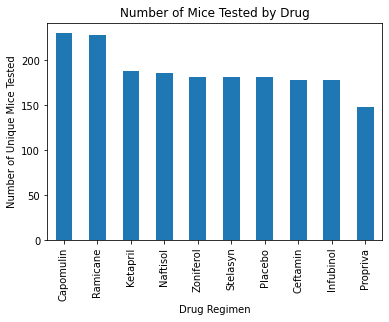

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
#Get count by Drug Regimen
count_regimen = cleaned_mousedata["Drug Regimen"].value_counts()
regimen_chart = count_regimen.plot(kind='bar')
regimen_chart.set_xlabel("Drug Regimen")
regimen_chart.set_ylabel("Number of Unique Mice Tested")
regimen_chart.set_title("Number of Mice Tested by Drug")
plt.show()

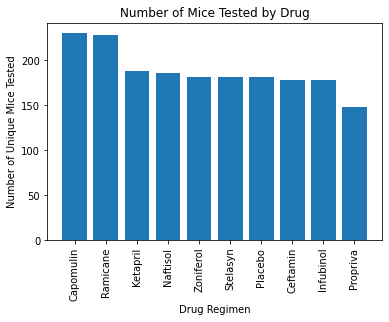

In [10]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.
#Set x and y axis

x_axis = count_regimen.index
# y_axis = cleaned_mousedata["Drug Regimen"].value_counts()
y_axis = count_regimen               
#Plot bar chart
plt.bar(x_axis,y_axis,align="center")
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.title("Number of Mice Tested by Drug")
plt.show()

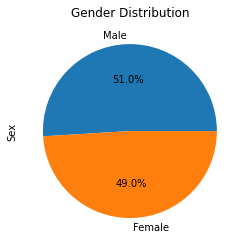

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_count = cleaned_mousedata[["Mouse ID","Sex"]]
unique_gendercount = gender_count["Sex"].value_counts()

gender_chart = unique_gendercount.plot(kind="pie",y=[1],autopct="%1.1f%%",title="Gender Distribution")

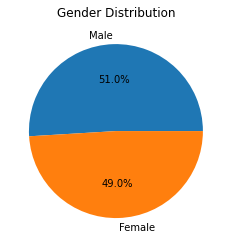

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = unique_gendercount.index

#plot pie chart
plt.title("Gender Distribution")
plt.pie(unique_gendercount,labels = gender,autopct="%1.1f%%")
plt.show()


## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
tumor_drug = cleaned_mousedata.loc[cleaned_mousedata["Drug Regimen"].isin(drug_list)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_mousedata.groupby(["Mouse ID"])["Timepoint"]
last_timepoint = last_timepoint.max()
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint = last_timepoint.merge(cleaned_mousedata,on=["Mouse ID","Timepoint"],how="left")
last_timepoint.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []                

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    vol = last_timepoint.loc[last_timepoint["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    tumor_vol.append(vol)
 
    # Quartiles and lower/upper bound calculations
    quartiles = vol.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    iqr_1_5 = iqr * 1.5
    lower_bound = lowerq - iqr_1_5
    upper_bound = upperq + iqr_1_5
    
 
    # Determine outliers using upper and lower bounds
    print(f"{drug}'s potential outliers: {vol.loc[(vol<lower_bound) | (vol > upper_bound)]}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


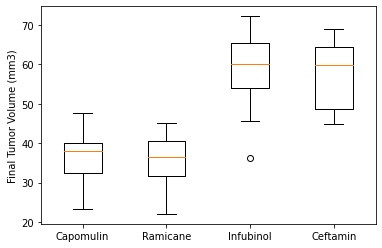

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol, labels=drug_list)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

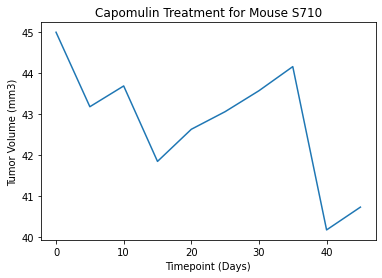

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tumor_time = cleaned_mousedata[["Mouse ID","Tumor Volume (mm3)","Timepoint","Drug Regimen"]]
tumor_time1 = tumor_time.loc[tumor_time["Drug Regimen"]=="Capomulin"]
tumor_time1 = tumor_time.loc[tumor_time["Mouse ID"]=="s710"]

# x and y labels
x_timepoint = tumor_time1["Timepoint"]
y_tumorvol = tumor_time1["Tumor Volume (mm3)"]

# Line plot
plt.plot(x_timepoint,y_tumorvol)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment for Mouse S710")
plt.show()

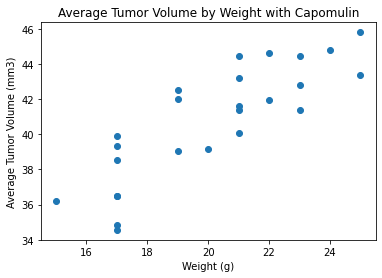

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tumor_weight = cleaned_mousedata[["Mouse ID","Tumor Volume (mm3)","Weight (g)","Drug Regimen"]]
tumor_weight = tumor_weight.loc[tumor_weight["Drug Regimen"]=="Capomulin"]
tumor_weight_grouped = tumor_weight.groupby("Mouse ID").mean()

# Set x and y axis
x_tw = tumor_weight_grouped["Weight (g)"]
y_tw = tumor_weight_grouped["Tumor Volume (mm3)"]

# Scatter plot
plt.scatter(x_tw,y_tw)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Weight with Capomulin")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


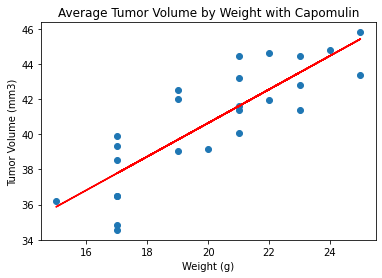

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(x_tw,y_tw)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_tw, y_tw)
regress_values = x_tw * slope + intercept

# Plot scatter chart with regression line
plt.scatter(x_tw,y_tw)
plt.plot(x_tw, regress_values,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Weight with Capomulin")
plt.show()